## Aanalalyzing the cateogical variables here: category,sub_category,sub_sub_category

In [41]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno

In [42]:
category_df = pd.read_csv("category.csv")
category_df.shape

(8773, 5)

In [43]:
from IPython.display import display
display(category_df.head())

Unnamed: 0           category sub_category sub_sub_category  gender
0           0           clothing         tops             None    mens
1           1  sports & outdoors    team shop    team clothing  unisex
2           2  sports & outdoors    team shop    team clothing  unisex
3           3           clothing     sweaters             None  womens
4           5  sports & outdoors    team shop    team clothing  unisex

In [44]:
category_df = category_df.iloc[:,1:5]
category_df.head()


category sub_category sub_sub_category  gender
0           clothing         tops             None    mens
1  sports & outdoors    team shop    team clothing  unisex
2  sports & outdoors    team shop    team clothing  unisex
3           clothing     sweaters             None  womens
4  sports & outdoors    team shop    team clothing  unisex

In [45]:
category_df.describe()

category sub_category sub_sub_category  gender
count                7238         8773             8773    8773
unique                 11           78              152      11
top     sports & outdoors    team shop             None  unisex
freq                 3539         3528             3666    3674

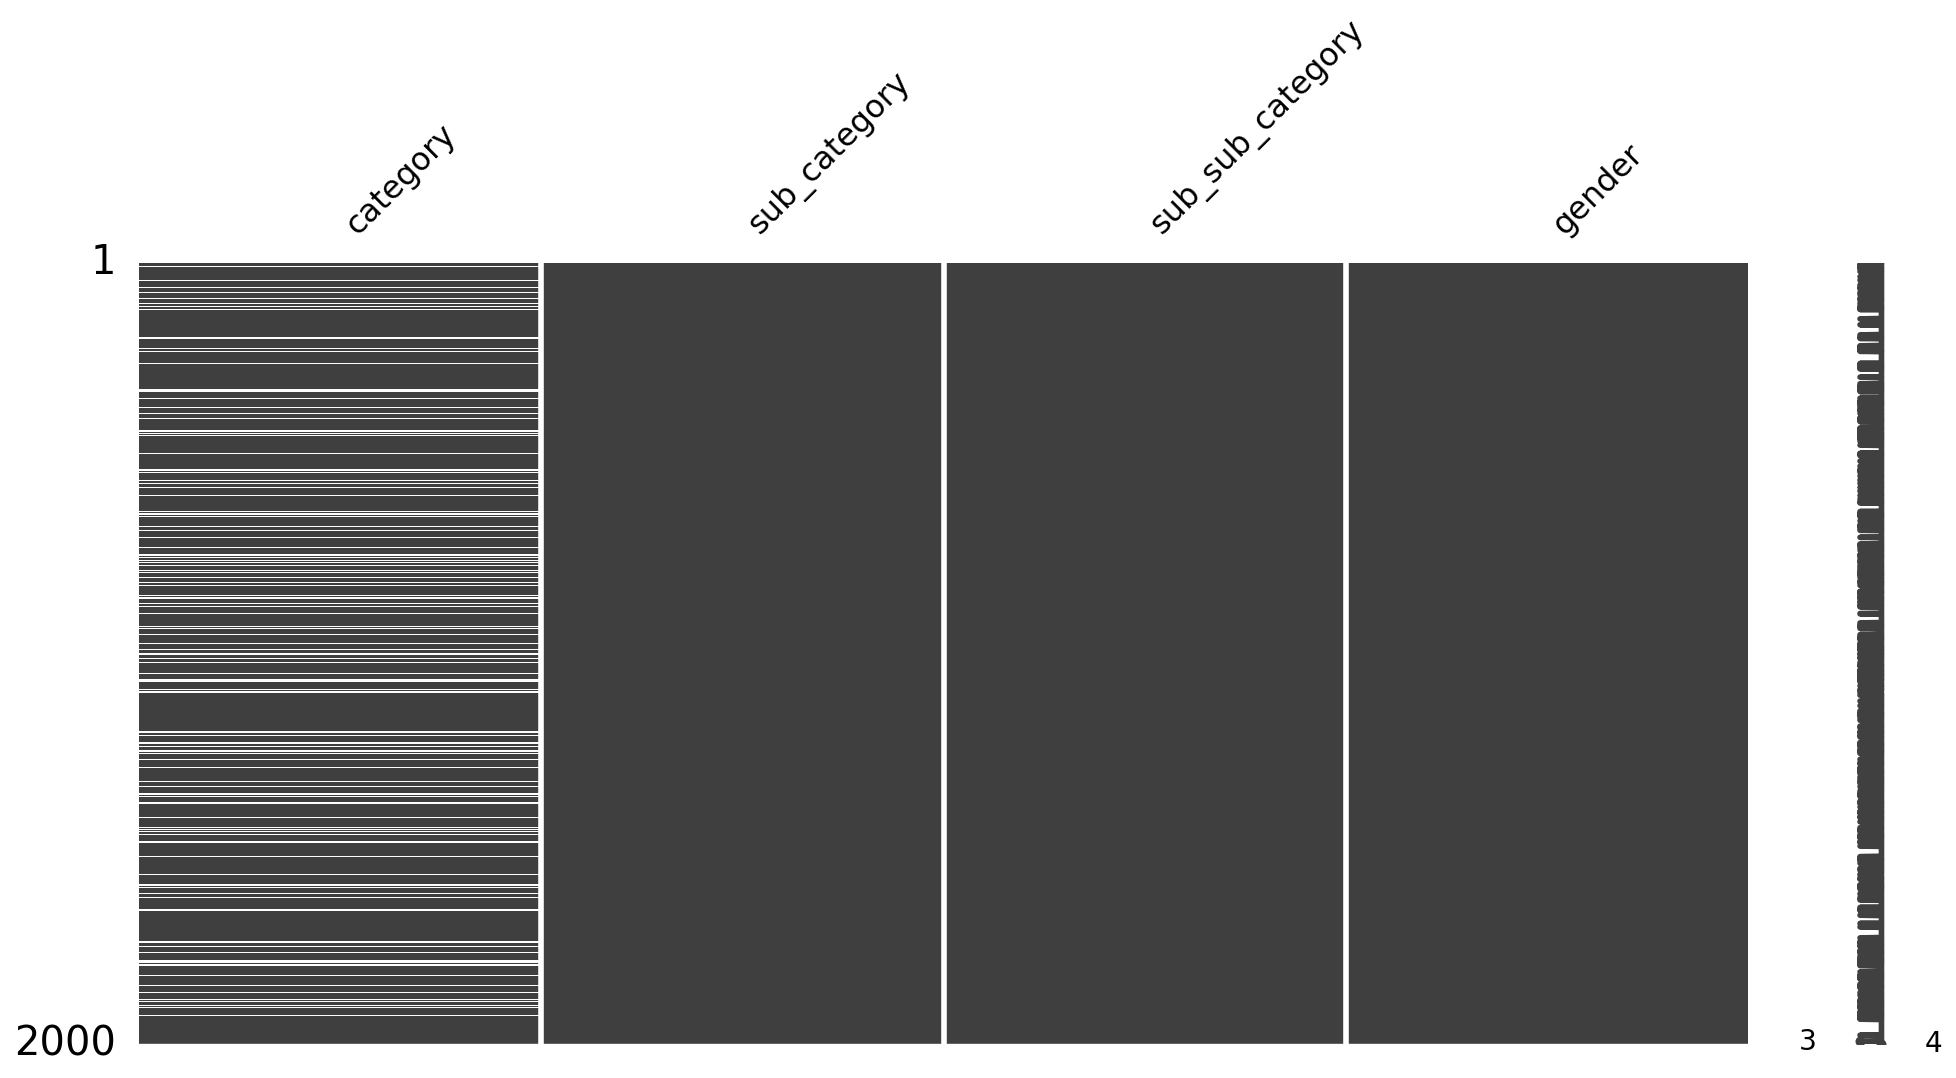

In [46]:
# checking missing variables
msno.matrix(category_df.sample(2000),
            figsize=(16, 7),
            width_ratios=(15, 1))

In [47]:
print("ALl title and desciption:", len(category_df))
print("Category nulls:", len(category_df[(category_df.category.isnull())]))
print("Sub category nulls:", len(category_df[category_df.sub_category.isnull()]))
print("Sub sub_category nulls:", len(category_df[category_df.sub_sub_category.isnull()]))
print("Gender None:", len(category_df[category_df['gender'] == 'None']))

ALl title and desciption: 8773
Category nulls: 1535
Sub category nulls: 0
Sub sub_category nulls: 0
Gender None: 1775


In [48]:
category_gender_table = pd.crosstab(index=category_df["category"], 
                          columns=category_df["gender"])

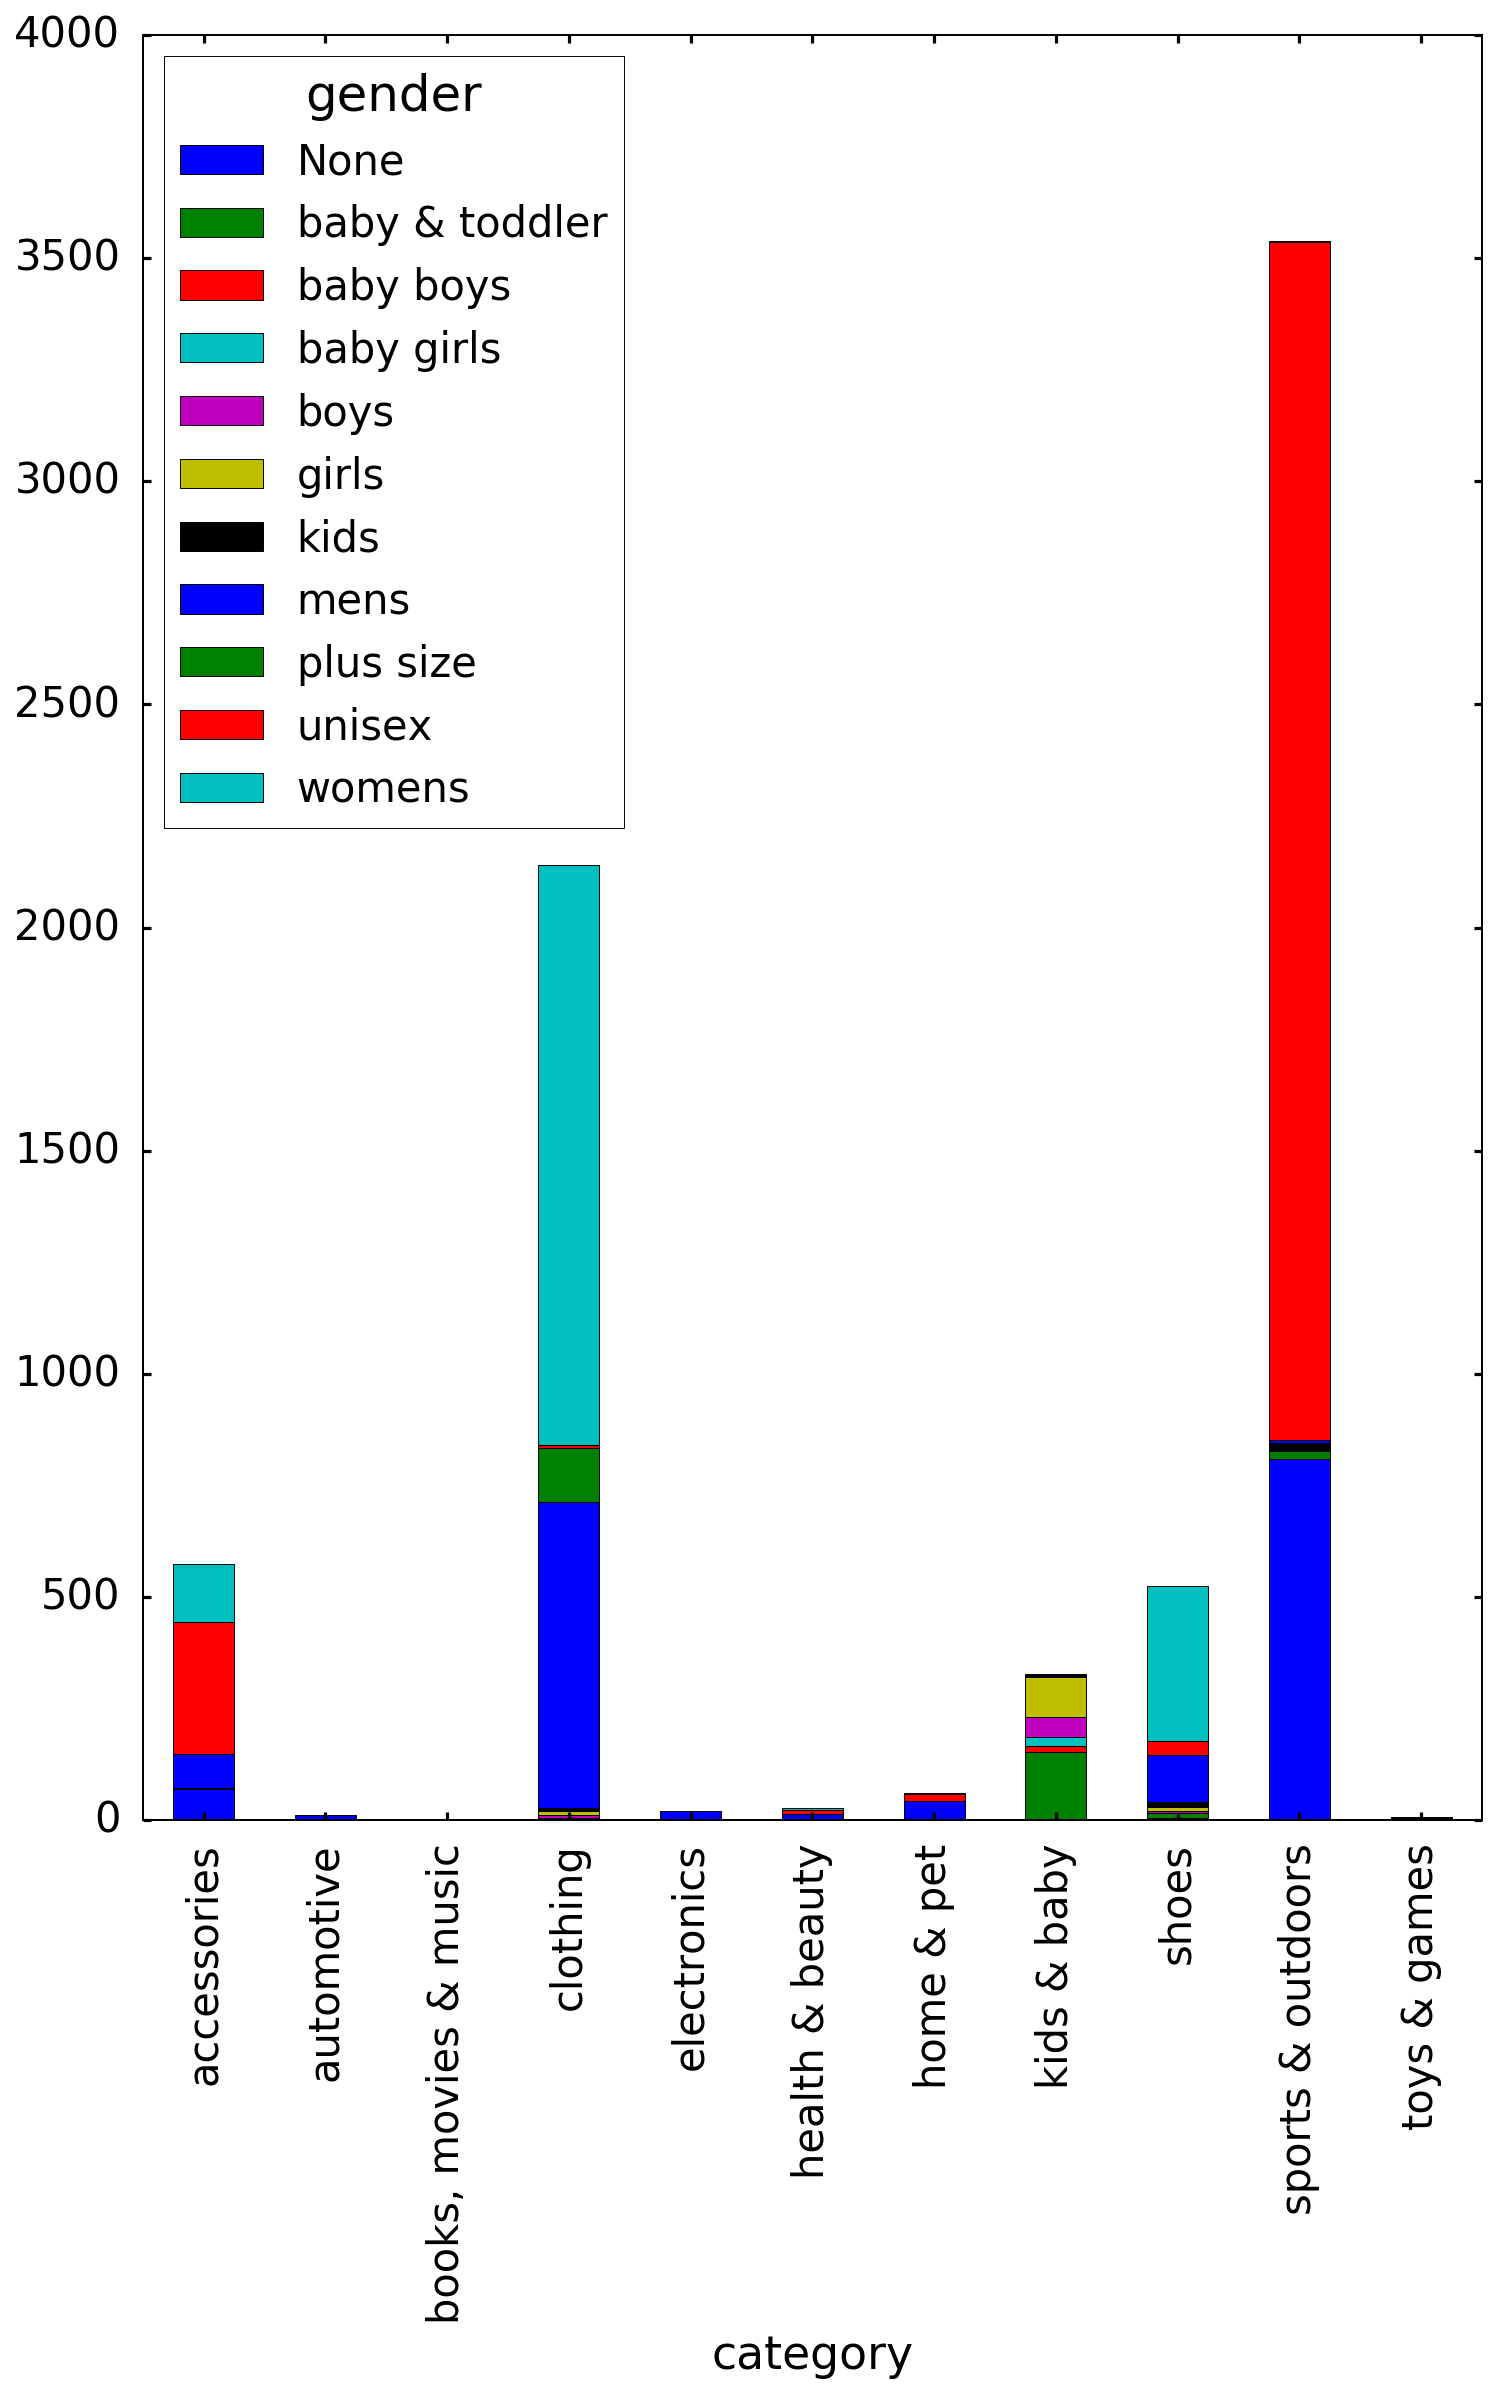

In [49]:
category_gender_table.plot(kind="bar", 
                 figsize=(12,16),
                 stacked=True)

In [50]:
#remove all NONE and NULL
cat_df = category_df[category_df['category'] != 'None']
cat_df.shape

(8773, 4)

In [51]:
cat_df = cat_df[cat_df['sub_category'] != 'None']
cat_df.shape

(7009, 4)

In [52]:
cat_df = cat_df[cat_df['gender'] != 'None']
cat_df.shape

(6032, 4)

In [53]:
cat_df = cat_df[cat_df['sub_sub_category'] != 'None']
cat_df.shape

(4207, 4)

In [54]:
# so no null and no none in the datset
len(cat_df[cat_df.category.notnull()])

4207

In [55]:
cat_dummies_df = pd.get_dummies(cat_df)
print("After One HOT encoding \n",list(cat_dummies_df.columns))

After One HOT encoding 
 ['category_accessories', 'category_clothing', 'category_health & beauty', 'category_home & pet', 'category_kids & baby', 'category_shoes', 'category_sports & outdoors', 'category_toys & games', 'sub_category_activewear', 'sub_category_adventure sports', 'sub_category_baby', 'sub_category_beauty', 'sub_category_boots', 'sub_category_boys clothing', 'sub_category_building blocks & sets', 'sub_category_denim', 'sub_category_dolls & stuffed animals', 'sub_category_dresses', 'sub_category_flats', 'sub_category_food & gifts', 'sub_category_games & puzzles', 'sub_category_girls clothing', 'sub_category_gloves & mittens', 'sub_category_hair accessories', 'sub_category_handbags', 'sub_category_hats', 'sub_category_health care', 'sub_category_jewelry', 'sub_category_loafers', 'sub_category_luggage & bags', 'sub_category_maternity clothing', 'sub_category_outerwear', 'sub_category_pants', 'sub_category_pet', 'sub_category_sandals', 'sub_category_skirts', 'sub_category_sle

#### next we will convert it into numpy arrays

In [56]:
features_cat_df = cat_dummies_df.ix[:,'category_accessories':'sub_sub_category_wristlets']

In [57]:
X = features_cat_df.values
#y = cat_dummies_df.ix[:,'gender_baby & toddler':'gender_womens'].values
cat_df['gender_label']= cat_df.gender.map({'unisex':0, 'womens':1,'mens':2,'baby & toddler':3,'plus size':4,'girls':5,
                               'kids':6,'boys':7,'baby girls':8})

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,random_state = 0)

In [59]:
X_train.size

552125

In [60]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()
knn2.fit(X_train,y_train.values.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
knn2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
y_test.values

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [63]:
from sklearn.cross_validation import cross_val_score

cross_val_score(knn2,X, y.values.astype(int), cv=5)

array([ 0.89125296,  0.88981043,  0.90844233,  0.89630513,  0.87933094])

#using Random Forest



In [64]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train.values.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
forest.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
from sklearn.cross_validation import cross_val_score

cross_val_score(forest,X, y.values.astype(int), cv=5)

array([ 0.89598109,  0.8957346 ,  0.90249703,  0.9034565 ,  0.89366786])